# YAML Place and AutoRoute

You have two options for working with gdsfactory:

1. **python flow**: you define your layout using python functions (Parametric Cells), and connect them with routing functions.
2. **YAML Place and AutoRoute**: you define your circuit (Place and Route) in YAML. From the netlist you can simulate the circuit or generate the layout.


YAML is a human readable version of JSON that you can use to define components placements and routes

to define a a YAML Component you need to define:

- instances: with each instance setting
- placements: with X and Y

And optionally:

- routes: between instance ports
- connections: to connect instance ports to other ports (without routes)
- ports: define input and output circuit ports


When running this tutorial make sure you UNCOMMENT this line `%matplotlib widget` so you can see the changes in the YAML file both in KLayout and matplotlib.

`# %matplotlib widget`  -> `%matplotlib widget`

In [1]:
# %matplotlib widget

2023-01-03 02:09:39.308 | INFO     | gdsfactory.config:<module>:48 - Load '/home/runner/work/gdsfactory/gdsfactory/gdsfactory' 6.17.0


Textarea(value='\nname: sample_different_factory\n\ninstances:\n    bl:\n      component: pad\n    tl:\n      …

Output()

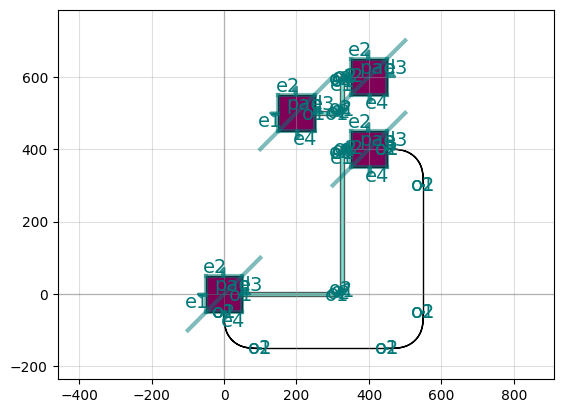

In [2]:
import ipywidgets
from IPython.display import clear_output
import matplotlib.pyplot as plt
import gdsfactory as gf

x = ipywidgets.Textarea(rows=20, columns=480)

x.value = """
name: sample_different_factory

instances:
    bl:
      component: pad
    tl:
      component: pad
    br:
      component: pad
    tr:
      component: pad

placements:
    tl:
        x: 200
        y: 500

    br:
        x: 400
        y: 400

    tr:
        x: 400
        y: 600


routes:
    electrical:
        settings:
            separation: 20
            layer: [31, 0]
            width: 10
        links:
            tl,e3: tr,e1
            bl,e3: br,e1
    optical:
        settings:
            radius: 100
        links:
            bl,e4: br,e3
"""

out = ipywidgets.Output()
display(x, out)


def f(change, out=out):
    try:
        c = gf.read.from_yaml(change["new"])
        # clear_output()
        fig = c.plot()
        c.show(show_ports=True)
        out.clear_output()
    except Exception as e:
        out.clear_output()
        with out:
            display(e)


x.observe(f, "value")
f({"new": x.value})

Lets start by defining the `instances` and `placements` section in YAML

Lets place an `mmi_long` where you can place the `W0` port at `x=20, y=10`

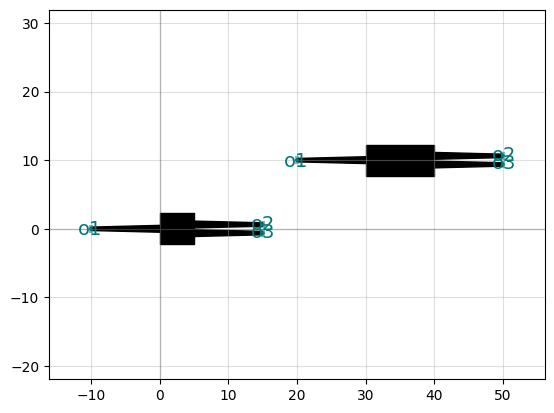

Textarea(value='\nname: mmis\ninstances:\n    mmi_long:\n      component: mmi1x2\n      settings:\n        wid…

Output()

In [3]:
x.value = """
name: mmis
instances:
    mmi_long:
      component: mmi1x2
      settings:
        width_mmi: 4.5
        length_mmi: 10
    mmi_short:
      component: mmi1x2
      settings:
        width_mmi: 4.5
        length_mmi: 5

placements:        
    mmi_long:
        port: o1
        x: 20
        y: 10
        mirror: False
"""
display(x, out)

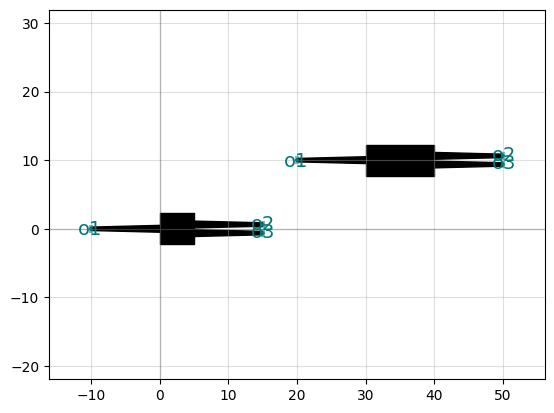

Textarea(value='\nname: mmi_mirror\ninstances:\n    mmi_long:\n      component: mmi1x2\n      settings:\n     …

Output()

In [4]:
x.value = """
name: mmi_mirror
instances:
    mmi_long:
      component: mmi1x2
      settings:
        width_mmi: 4.5
        length_mmi: 10
    mmi_short:
      component: mmi1x2
      settings:
        width_mmi: 4.5
        length_mmi: 5

placements:        
    mmi_long:
        port: o1
        x: 20
        y: 10
        mirror: False
"""
display(x, out)

## ports

You can expose any ports of any instance to the new Component with a `ports` section in YAML

Lets expose all the ports from `mmi_long` into the new component.

Ports are exposed as `new_port_name: instance_name, port_name`

you can see the ports in `red` and subports in `blue`

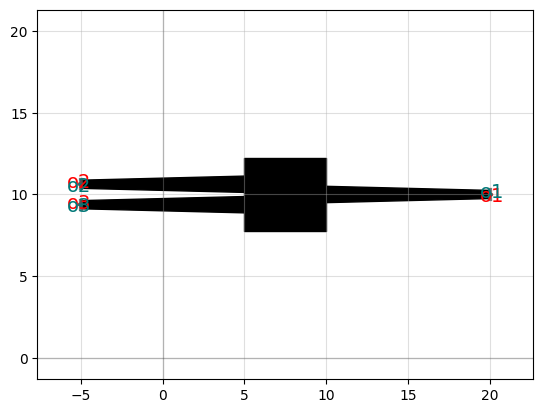

Textarea(value='\nname: ports_demo\ninstances:\n    mmi_long:\n      component: mmi1x2\n      settings:\n     …

Output()

In [5]:
x.value = """
name: ports_demo
instances:
    mmi_long:
      component: mmi1x2
      settings:
        width_mmi: 4.5
        length_mmi: 5
placements:        
    mmi_long:
        port: o1
        x: 20
        y: 10
        mirror: True
        
ports:
    o3: mmi_long,o3
    o2: mmi_long,o2
    o1: mmi_long,o1
"""

display(x, out)

You can also define a mirror placement using a port

Try mirroring with other ports `o2`, `o3` or with a number as well as with a rotation `90`, `180`, `270`

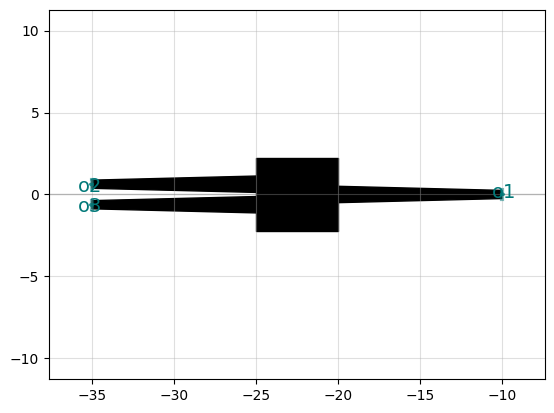

Textarea(value='\nname: mirror_demo\ninstances:\n    mmi_long:\n      component: mmi1x2\n      settings:\n    …

Output()

In [6]:
x.value = """
name: mirror_demo
instances:
    mmi_long:
      component: mmi1x2
      settings:
        width_mmi: 4.5
        length_mmi: 5
placements:        
    mmi_long:
        x: 0
        y: 0
        mirror: o1
        rotation: 0
"""

display(x, out)

## connections

You can connect any two instances by defining a `connections` section in the YAML file.

it follows the syntax.

`instance_source,port : instance_destination,port`

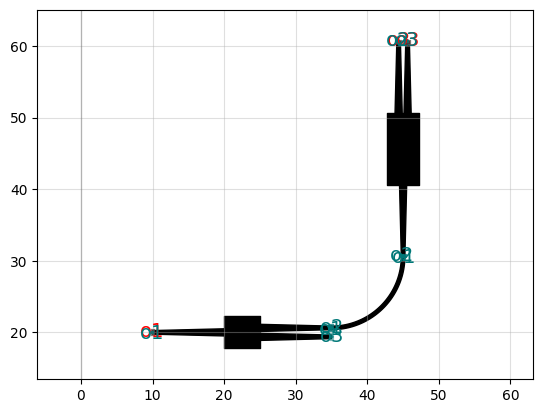

Textarea(value='\nname: connections_demo\ninstances:\n    b:\n      component: bend_circular\n    mmi_long:\n …

Output()

In [7]:
x.value = """
name: connections_demo
instances:
    b:
      component: bend_circular
    mmi_long:
      component: mmi1x2
      settings:
        width_mmi: 4.5
        length_mmi: 10
    mmi_short:
      component: mmi1x2
      settings:
        width_mmi: 4.5
        length_mmi: 5
placements:
    mmi_short:
        port: o1
        x: 10
        y: 20
connections:
    b,o1 : mmi_short,o2
    mmi_long,o1: b, o2

ports:
    o1: mmi_short,o1
    o2: mmi_long,o2
    o3: mmi_long,o3
"""

display(x, out)

**Relative port placing**

You can also place a component with respect to another instance port

You can also define an x and y offset with `dx` and `dy`

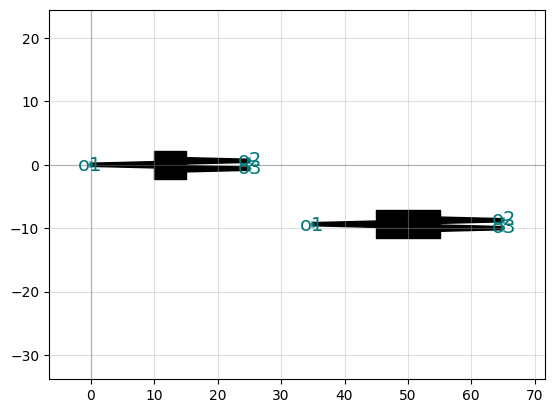

Textarea(value='\nname: rel_port_placing\ninstances:\n    mmi_long:\n      component: mmi1x2\n      settings:\…

Output()

In [8]:
x.value = """
name: rel_port_placing
instances:
    mmi_long:
      component: mmi1x2
      settings:
        width_mmi: 4.5
        length_mmi: 10
    mmi_short:
      component: mmi1x2
      settings:
        width_mmi: 4.5
        length_mmi: 5

placements:
    mmi_short:
        port: o1
        x: 0
        y: 0
    mmi_long:
        port: o1
        x: mmi_short,o2
        y: mmi_short,o2
        dx : 10
        dy: -10
"""


display(x, out)

## routes

You can define routes between two instances by defining a `routes` section in YAML

it follows the syntax

```YAML

routes:
    route_name:
        links:
            instance_source,port: instance_destination,port
        settings:  # for the route (optional)
            waveguide: strip
            width: 1.2

```

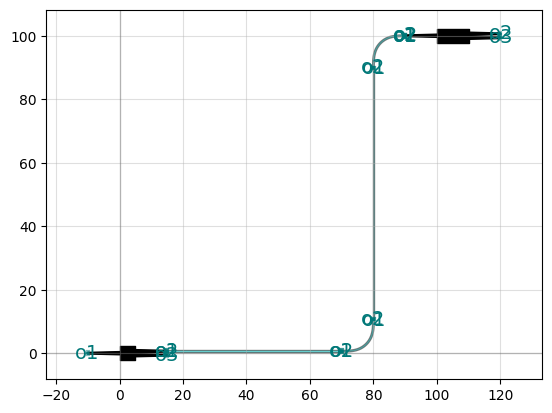

Textarea(value='\nname: with_routes\ninstances:\n    mmi_long:\n      component: mmi1x2\n      settings:\n    …

Output()

In [9]:
x.value = """
name: with_routes
instances:
    mmi_long:
      component: mmi1x2
      settings:
        width_mmi: 4.5
        length_mmi: 10
    mmi_short:
      component: mmi1x2
      settings:
        width_mmi: 4.5
        length_mmi: 5
placements:
    mmi_long:
        x: 100
        y: 100
routes:
    optical:
        links:
            mmi_short,o2: mmi_long,o1
        settings:
            cross_section:
                cross_section: strip
                settings:
                    layer: [2, 0]
"""

display(x, out)

You can **rotate** and instance specifying the angle in degrees

You can also access the routes in the newly created component

## instances, placements, connections, ports, routes

Lets combine all you learned so far.

You can define the netlist connections of a component by a netlist in YAML format

Note that you define the connections as `instance_source.port ->
instance_destination.port` so the order is important and therefore you can only
change the position of the `instance_destination`


You can define several routes that will be connected using `gf.routing.get_bundle`

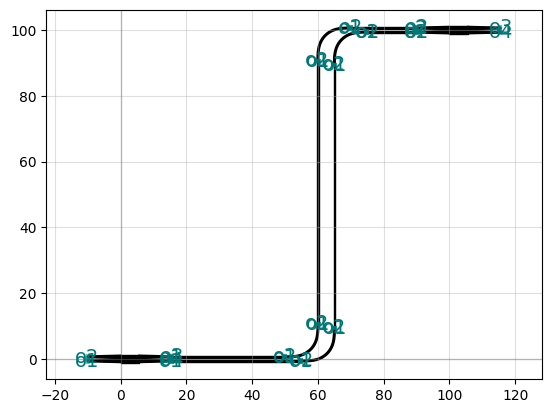

Textarea(value='\nname: connections_2x2_problem\n\ninstances:\n    mmi_bottom:\n      component: mmi2x2\n    m…

Output()

In [10]:
x.value = """
name: connections_2x2_problem

instances:
    mmi_bottom:
      component: mmi2x2
    mmi_top:
      component: mmi2x2

placements:
    mmi_top:
        x: 100
        y: 100

routes:
    optical:
        links:
            mmi_bottom,o4: mmi_top,o1
            mmi_bottom,o3: mmi_top,o2

"""

display(x, out)

You can also add custom component_factories to `gf.read.from_yaml`

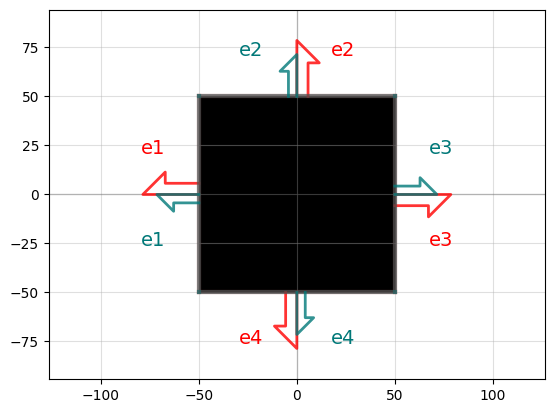

In [11]:
@gf.cell
def pad_new(size=(100, 100), layer=gf.LAYER.WG):
    c = gf.Component()
    compass = c << gf.components.compass(size=size, layer=layer)
    c.ports = compass.ports
    return c


gf.get_active_pdk().register_cells(pad_new=pad_new)
c = pad_new(cache=False)
f = c.plot()

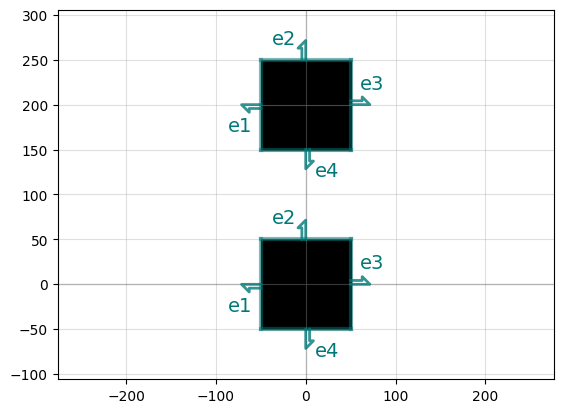

Textarea(value='\nname: connections_2x2_problem\n\ninstances:\n    bot:\n      component: pad_new\n    top:\n …

Output()

In [12]:
x.value = """
name: connections_2x2_problem

instances:
    bot:
      component: pad_new
    top:
      component: pad_new

placements:
    top:
        x: 0
        y: 200
"""

display(x, out)

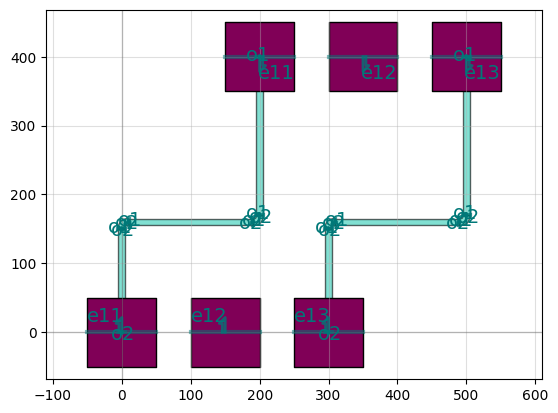

Textarea(value='\nname: custom_routes\n\ninstances:\n    t:\n      component: pad_array\n      settings:\n    …

Output()

In [13]:
x.value = """
name: custom_routes

instances:
    t:
      component: pad_array
      settings:
          orientation: 270
          columns: 3
    b:
      component: pad_array
      settings:
          orientation: 90
          columns: 3

placements:
    t:
        x: 200
        y: 400
routes:
    electrical:
        settings:
            layer: [31, 0]
            width: 10.
            end_straight_length: 150
        links:
            t,e11: b,e11
            t,e13: b,e13
"""

display(x, out)

Also, you can define route aliases, that have different settings and specify the route `factory` as a parameter as well as the `settings` for that particular route alias.

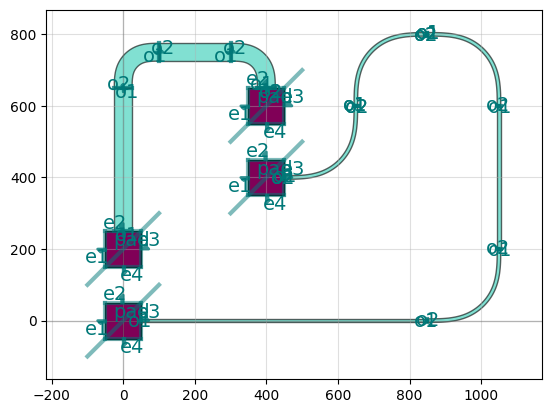

Textarea(value='\nname: sample_settings\n\ninstances:\n    bl:\n      component: pad\n    tl:\n      component…

Output()

In [14]:
x.value = """
name: sample_settings

instances:
    bl:
      component: pad
    tl:
      component: pad
    br:
      component: pad
    tr:
      component: pad

placements:
    tl:
        x: 0
        y: 200

    br:
        x: 400
        y: 400

    tr:
        x: 400
        y: 600

routes:
    optical_r100:
        settings:
            radius: 100
            layer: [31, 0]
            width: 50
        links:
            tl,e2: tr,e2
    optical_r200:
        settings:
            radius: 200
            width: 10
            layer: [31, 0]
        links:
            bl,e3: br,e3
"""

display(x, out)

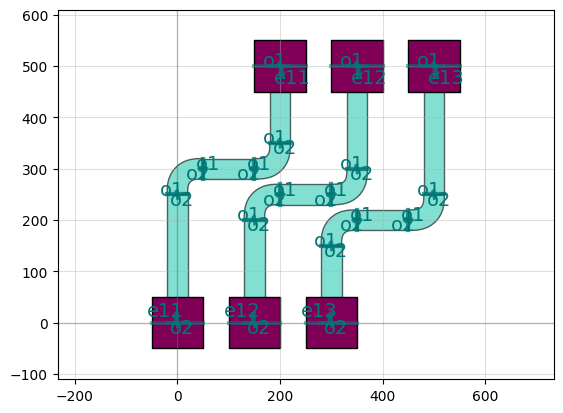

/home/runner/work/gdsfactory/gdsfactory/gdsfactory/component.py:1480: UserWarning: Component 'Unnamed_b65bdc03' contains 1 Unnamed cells
  warnings.warn(


Textarea(value='\ninstances:\n    t:\n      component: pad_array\n      settings:\n          orientation: 270\…

Output()

In [15]:
x.value = """
instances:
    t:
      component: pad_array
      settings:
          orientation: 270
          columns: 3
    b:
      component: pad_array
      settings:
          orientation: 90
          columns: 3

placements:
    t:
        x: 200
        y: 500
routes:
    optical:
        settings: 
            radius: 50
            width: 40
            layer: [31,0]
            end_straight_length: 150
            separation: 50
        links:
            t,e11: b,e11
            t,e12: b,e12
            t,e13: b,e13
"""

display(x, out)

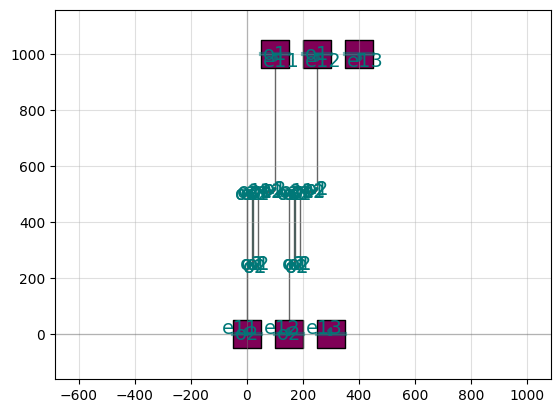

/home/runner/work/gdsfactory/gdsfactory/gdsfactory/component.py:1480: UserWarning: Component 'Unnamed_e5a6bfdc' contains 1 Unnamed cells
  warnings.warn(


Textarea(value='\n\ninstances:\n    t:\n      component: pad_array\n      settings:\n          orientation: 27…

Output()

In [16]:
x.value = """

instances:
    t:
      component: pad_array
      settings:
          orientation: 270
          columns: 3
    b:
      component: pad_array
      settings:
          orientation: 90
          columns: 3

placements:
    t:
        x: 100
        y: 1000
routes:
    route1:
        routing_strategy: get_bundle_path_length_match
        settings: 
            extra_length: 500
            width: 2
            layer: [31,0]
            end_straight_length: 500
        links:
            t,e11: b,e11
            t,e12: b,e12
"""

display(x, out)

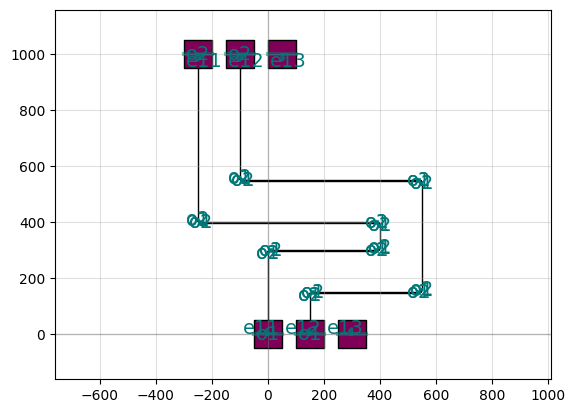

/home/runner/work/gdsfactory/gdsfactory/gdsfactory/component.py:1480: UserWarning: Component 'Unnamed_75b44ce9' contains 1 Unnamed cells
  warnings.warn(


Textarea(value='\ninstances:\n    t:\n      component: pad_array\n      settings:\n          orientation: 270\…

Output()

In [17]:
x.value = """
instances:
    t:
      component: pad_array
      settings:
          orientation: 270
          columns: 3
    b:
      component: pad_array
      settings:
          orientation: 90
          columns: 3

placements:
    t:
        x: -250
        y: 1000
routes:
    route1:
        routing_strategy: get_bundle_from_waypoints
        settings:
            waypoints:
                - [0, 300]
                - [400, 300]
                - [400, 400]
                - [-250, 400]
            auto_widen: False
        links:
            b,e11: t,e11
            b,e12: t,e12

"""

display(x, out)

Note that you define the connections as `instance_source.port -> instance_destination.port` so the order is important and therefore you can only change the position of the `instance_destination`

## Custom factories

You can leverage netlist defined components to define more complex circuits

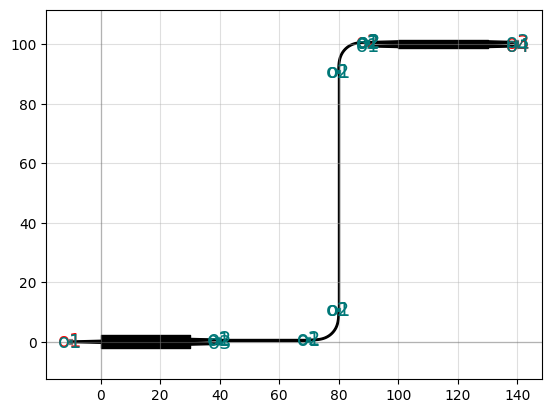

Textarea(value='\nname: sample_custom_cells\ninstances:\n    mmit:\n      component: mmi2x2_faba\n    mmib:\n …

Output()

In [18]:
mmi1x2_faba = gf.partial(gf.components.mmi1x2, length_mmi=30)
mmi2x2_faba = gf.partial(gf.components.mmi2x2, length_mmi=30)
gf.get_active_pdk().register_cells(mmi1x2_faba=mmi1x2_faba, mmi2x2_faba=mmi2x2_faba)

x.value = """
name: sample_custom_cells
instances:
    mmit:
      component: mmi2x2_faba
    mmib:
      component: mmi1x2_faba
      settings:
        width_mmi: 4.5
placements:
    mmit:
        x: 100
        y: 100
routes:
    route1:
        links:
            mmib,o2: mmit,o2
            
ports:
    o1: mmib,o1
    o2: mmit,o2
    o3: mmit,o3
    o4: mmit,o4
"""

display(x, out)

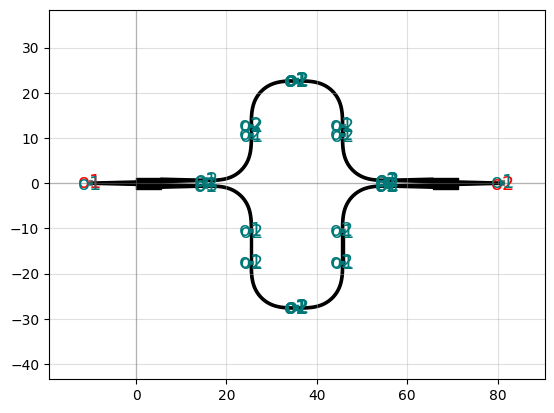

mzi: uid 616e0a80, ports ['o1', 'o2'], references ['bend_euler_1', 'bend_euler_2', 'bend_euler_3', 'bend_euler_4', 'bend_euler_5', 'bend_euler_6', 'straight_5', 'straight_6', 'straight_7', 'bend_euler_7', 'bend_euler_8', 'straight_8', 'straight_9', 'straight_10', 'sytl', 'syl', 'sxt', 'sxb', 'cp1', 'cp2'], 0 polygons

In [19]:
c = gf.components.mzi()
c

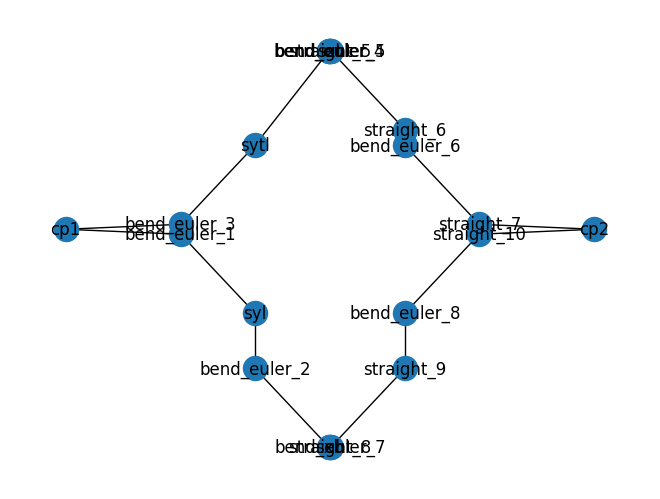

In [20]:
c.plot_netlist()

In [21]:
n = c.get_netlist()

In [22]:
print(c.get_netlist().keys())

dict_keys(['connections', 'instances', 'placements', 'ports', 'name'])


## variables


You can define a global variables `settings` in your YAML file, and use the variable in the other YAML settings by using `${settings.length_mmi}`

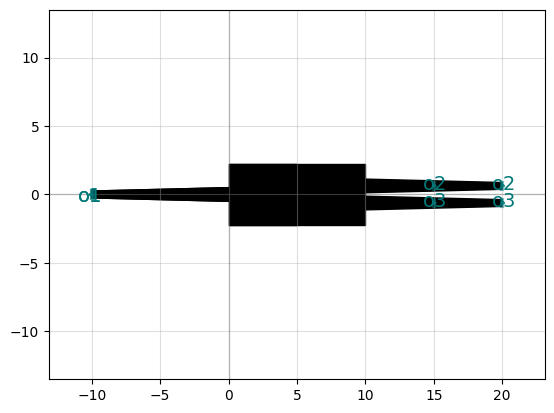

/home/runner/work/gdsfactory/gdsfactory/gdsfactory/component.py:1480: UserWarning: Component 'Unnamed_d74be02d' contains 1 Unnamed cells
  warnings.warn(


Textarea(value='\nsettings:\n    length_mmi: 10\n\ninstances:\n    mmi_long:\n      component: mmi1x2\n      s…

Output()

In [23]:
x.value = """
settings:
    length_mmi: 10

instances:
    mmi_long:
      component: mmi1x2
      settings:
        width_mmi: 4.5
        length_mmi: ${settings.length_mmi}
    mmi_short:
      component: mmi1x2
      settings:
        width_mmi: 4.5
        length_mmi: 5
"""

display(x, out)